### Assignment 1B<br>
### Name: Tanveer Sharma<br>
### Roll No : 22M1062<br>

In [5]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import math
import cmath
from IPython.display import Audio


Initially I have defined Rectangular and Hamming Window Function.<br>
As window Samples can be found by<br>
                    $ Window Samples=Fs*Window Length$<br>
Then I have plotted both time and frequency domain spectrum  for both window functions respectively just for visualisation using dft for 80 samples corresponding to window length 5ms.<br>

We can find number of samples for each window length by using above formula.<br>

$$
\begin{aligned}
& \text {Samples corresponding to Window Length}\\
&\begin{array}{cc}
\hline \hline \text { Window Length } & \text { Window Samples } \\
\hline 5ms & 80\\
10ms & 160\\
20ms & 320\\
40ms &  640\\
\hline
\end{array}
\end{aligned}
$$



In general for computing the DFT I have taken a DFT length, $N = 1024$ because the highest number of samples obtained after using  $Fs=16kHz$ and for highest window length = 40ms will give us $640$  window samples <br>


## ** Defining Hamming Window Function **

In [30]:
def hamming_window(w_size):
  h_w = signal.windows.hamming(w_size)
  return(h_w)


Plot of Hamming Window for 80 samples

C:\Users\DELL\AppData\Local\Temp\ipykernel_10188\770208592.py:8: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

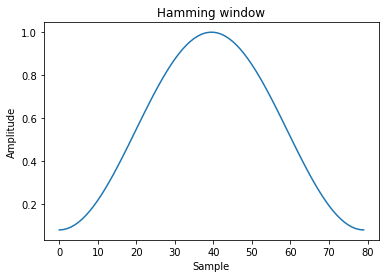

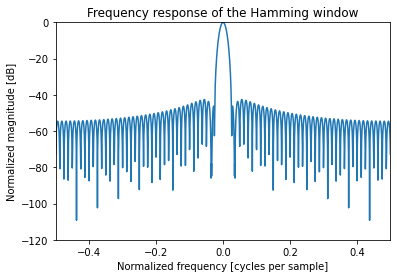

In [7]:
plt.plot(signal.windows.hamming(80))
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
A = fft(signal.windows.hamming(80), 2048) / (len(signal.windows.hamming(80))/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Hamming window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

## **Defining Rectangular Window Function**

In [8]:
def rect_window(w_size):
  r_w = signal.windows.boxcar(w_size)
  return(r_w)


Plot of rectangular window for 80 samples

C:\Users\DELL\AppData\Local\Temp\ipykernel_10188\1607025393.py:8: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

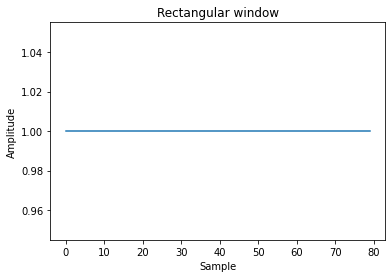

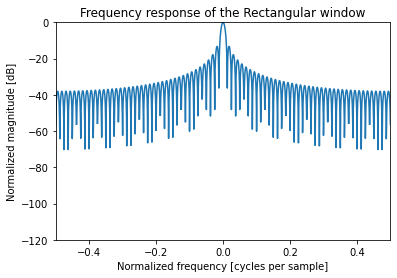

In [9]:
plt.plot(signal.windows.boxcar(80))
plt.title("Rectangular window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
A = fft(signal.windows.boxcar(80), 2048) / (len(signal.windows.boxcar(80))/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Rectangular window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

#### Defining Fuction to find  actual pitch F0 in case of window size T=20 ms and T=40 ms at F0=120 and F0=220 respectively

In [10]:
def pitch_120(mag_vk):
  dft_len = 1024
  Fs = 16000
  V_k = np.fft.fft(V_n, n=dft_len)
  # Frequency for plotting
  freq = np.fft.fftfreq(V_k.shape[-1], T)
 
  step = Fs/dft_len

  f1 = (int(round(50/step)))
  f2 = (int(np.round(200/step)))
  k = np.argmax(mag_vk[f1:f2])
  formant0 = freq[k]
  return(formant0)
def pitch_220(mag_vk):
  dft_len = 1024
  Fs = 16000
  V_k = np.fft.fft(V_n, n=dft_len)
  # Frequency for plotting
  freq = np.fft.fftfreq(V_k.shape[-1], T)
 
  step = Fs/dft_len

  f1 = (int(round(100/step)))
  f2 = (int(np.round(350/step)))
  k = np.argmax(mag_vk[f1:f2])
  formant0 = freq[k]
  return(formant0)

#### Defining Fuction to find  actual values of Formants F1,F2 and F3 for different window size given in question

In [11]:
def actual_formants(mag_vk):
  dft_len = 1024
  Fs = 16000
  V_k = np.fft.fft(V_n, n=dft_len)
  # Frequency for plotting
  freq = np.fft.fftfreq(V_k.shape[-1], T)
 
  step = Fs/dft_len

  f1 = (int(round(0/step)))
  f2 = (int(np.round(500/step)))
  k = np.argmax(mag_vk[f1:f2])
  formant1 = freq[k]

  # Second Formant F1 = 700, F2 = 900 Hz
  f1 = (int(np.round(700/step)))
  f2 = (int(np.round(900/step)))
  k = np.argmax(mag_vk[f1:f2])
  formant2 = freq[k+f1]

  # Third Formant F1 = 2000, F2 = 2500 Hz
  f1 = (int(np.round(2000/step)))
  f2 = (int(np.round(2500/step)))
  k = np.argmax(mag_vk[f1:f2])
  formant3 = freq[k+f1]
  return(formant1,formant2,formant3)

 Given Ground Truth values:

$F0=120Hz$<br>
$F0=220Hz$<br>
$F1 = 300 Hz, F2 = 870 Hz, F3 = 2240 Hz$<br>
We know from theory that wide band i.e. small window analysis is performed to find the location of formants(F1,F2,F3) and narrow band  i.e large window analysis is performed to determine the Pitch(F0) and harmonics of the vowel u.<br>

I have determined the below given parameters for spectrum with different window size:

$$
\begin{aligned}
& \text {Parameters corresponding to Window Length}\\
&\begin{array}{cc}
\hline \hline \text { Window Length } & \text { Parameters } \\
\hline 5ms & F1,F2,F3\\
10ms &  F1,F2,F3\\
20ms &  F0,F1,F2,F3\\
40ms &   F0,F1,F2,F3\\
\hline
\end{array}
\end{aligned}
$$

I have calculated exact value of pitch and formants corresponding to each window by using functions $ actual\_formants$,$pitch\_220$ and $pitch\_120$. Working of the functions is explained below

- For finding the formant locations using wide band analysis I have taken value of frequeny at local maxima. we can observe that at these formant locations the value of frequeny is the highest value in that region.

- For finding the F0 using narrow band analysis, we know that we will have the peaks at each harmonic location.  we can be clearly see the harmonics as lobes are narrowed. We will take the value of peak for the first peak.

Some small Observations corresponding to error I have given directly under the plots for each window length by comparing actual values with ground values.

## **Synthesising Vowel "U" for F0=120Hz**
By using Assignment 1A

Value of r is : 0.9805565561462569
Value of r^2 is :  0.9614911598014075
Value of theta1 is : 0.11780972450961724
Value of theta2 is : 0.34164820107789
Value of theta3 is : 0.8796459430051421


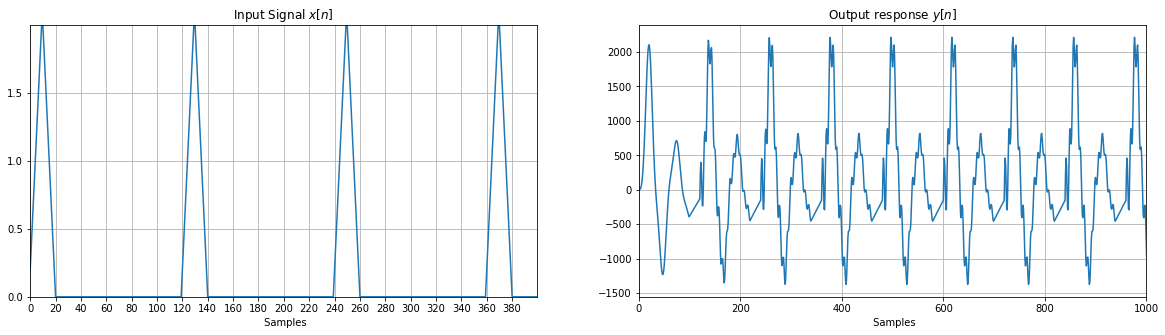

In [12]:
F1 = 300
F2=870
F3=2240
B1 = 100  
F0=120
T= 1/16000
theta1=2*math.pi*F1*T
theta2=2*math.pi*F2*T
theta3=2*math.pi*F3*T
cost1 = math.cos(theta1)
cost2 = math.cos(theta2)
cost3 = math.cos(theta3)

x=-1*math.pi*B1*T

r=math.exp(x)

print("Value of r is :",r)
print("Value of r^2 is : ",r**2)
print("Value of theta1 is :",theta1)
print("Value of theta2 is :",theta2)
print("Value of theta3 is :",theta3)

R=math.exp(x)
#first_iteration)

# Input Signal Triangle Unit 
input = []
i = 0 

while i<10:
    input.append((1+i)/5)
    i = i+1

i = 0   
while i<10  :
    input.append((10-i)/5)
    i = i+1

i = 0
while i<100 :
    input.append(0)
    i = i+1    



total_in = []
ts = []
i = 0
for k in range(5):
    i = 0
    while i<len(input):
        total_in.append(input[i])
        ts.append(i+k*len(input))
        i = i+1    

# Outputs
output1 = []

out = 0
y_mone =0
y_mtwo = 0 
# N= 10
n1 = []
i= 0

k = 0 
while i<120 :
    j = 0
    k = k+1
    while j<100:
        y_mtwo = y_mone
        y_mone = out
        out = input[j]+(2*R*cost1*y_mone) -(R*R*y_mtwo)
        n1.append(((k-1)*120)+j)
        output1.append(out)
        j = j+1

    i = i+1

output1 = np.array(output1)

    
#Iteration_2

output2 = []

out = 0
y_mone =0
y_mtwo = 0 
# N= 10
n2 = []
i= 0

k = 0 
while i<120 :
    j = 0
    k = k+1
    while j<100:
        y_mtwo = y_mone
        y_mone = out
        out = output1[j]+(2*R*cost2*y_mone) -(R*R*y_mtwo)
        n2.append(((k-1)*120)+j)
        output2.append(out)
        j = j+1

    i = i+1

output2 = np.array(output2)

#iteration_3
output3 = []

out = 0
y_mone =0
y_mtwo = 0 
# N= 10
n3 = []
i= 0

k = 0 
while i<120 :
    j = 0
    k = k+1
    while j<100:
        y_mtwo = y_mone
        y_mone = out
        out = output2[j]+(2*R*cost3*y_mone) -(R*R*y_mtwo)
        n3.append(((k-1)*120)+j)
        output3.append(out)
        j = j+1

    i = i+1

output3 = np.array(output3)
Audio(output3,rate =16000)
plt.rcParams["figure.figsize"] = (20,5)
plt.subplot(1, 2, 1)
plt.plot(ts,total_in)
plt.ylim((0,2))
plt.xlim((0,400))
plt.xticks(np.arange(0, 400, 20))
plt.yticks(np.arange(0, 2, .5))
plt.xlabel(" Samples")
plt.grid(True)

plt.title("Input Signal $x[n]$")
plt.subplot(1, 2, 2)
plt.plot(n3,output3)
plt.xlim((0,1000))
plt.grid(True)
plt.xlabel(" Samples")
plt.title("Output response $y[n]$")
plt.show()
Audio(output3,rate =16000)

##  Rectangular Window Length = 5 ms

Formants obtained using a Rectangular window of length 5 ms are: 
 First Formant: 281.25 Hz 
 Second Formant: 843.75 Hz 
 Third Formant: 2250.0 Hz
 Error in 1st Formant: -18.75 Hz 
 Error in Second Formant: -26.25 Hz 
 Error in Third Formant: 10.0 Hz


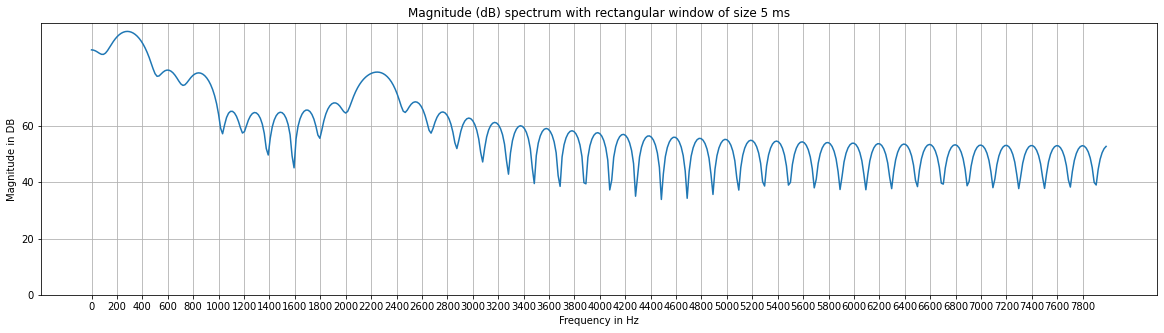

In [13]:
win_size = 5e-3
r_w=rect_window(80)
V_n = output3[4000:4000+r_w.shape[0]]* r_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.xticks(np.arange(0, 8000, 200))
plt.yticks(np.arange(0, 80, 20))
plt.title('Magnitude (dB) spectrum with rectangular window of size 5 ms')
formants=actual_formants(mag_vk)

print('Formants obtained using a Rectangular window of length 5 ms are: ')
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
F1 = 300
F2=870
F3=2240
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: Error in 2nd formant is higher as compared to 1st and 3rd formant

##  Rectangular Window Length = 10 ms

Formants obtained using a Rectangular window of length 10 ms are: 
 First Formant: 312.5 Hz 
 Second Formant: 796.875 Hz 
 Third Formant: 2234.375 Hz
 Error in 1st Formant: 12.5 Hz 
 Error in Second Formant: -73.125 Hz 
 Error in Third Formant: -5.625 Hz


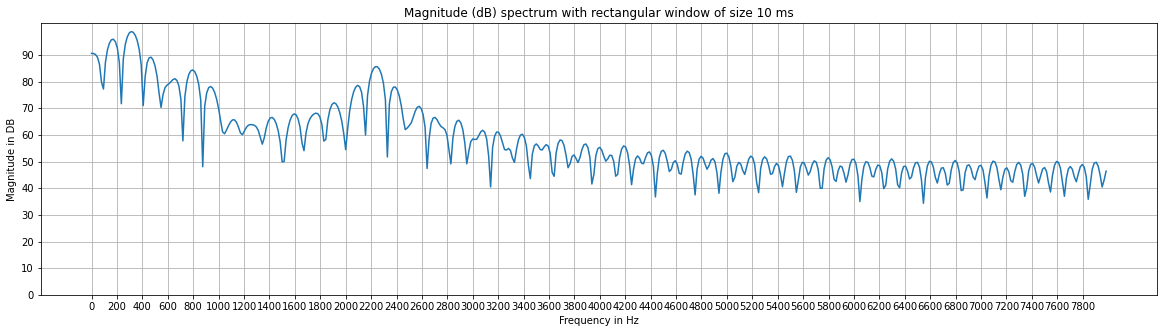

In [14]:
win_size = 5e-3
r_w=rect_window(160)
V_n = output3[4000:4000+r_w.shape[0]]* r_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xticks(np.arange(0, 8000, 200))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size 10 ms')
formants=actual_formants(mag_vk)

print('Formants obtained using a Rectangular window of length 10 ms are: ')
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
F1 = 300
F2=870
F3=2240
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))


Observation:  As window size increases Error in 1st and 3rd formant decreases and Error in 2nd formant increases 

##  Rectangular Window Length = 20 ms

Formants obtained using a Rectangular window of length 20 ms are: 
 Actual F0 : 109.375
 First Formant: 328.125 Hz 
 Second Formant: 812.5 Hz 
 Third Formant: 2234.375 Hz
 Error in F0:-10.625 Hz
 Error in 1st Formant: 28.125 Hz 
 Error in Second Formant: -57.5 Hz 
 Error in Third Formant: -5.625 Hz


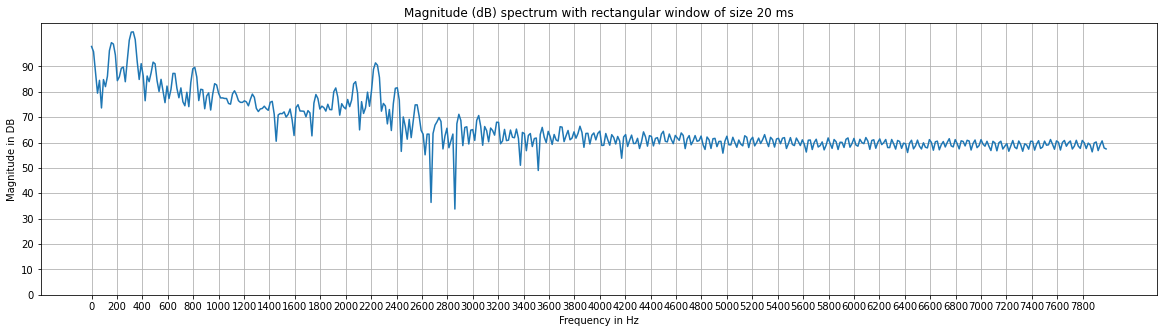

In [15]:
win_size = 5e-3
F0=120
r_w=rect_window(320)
V_n = output3[4000:4000+r_w.shape[0]]* r_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.xticks(np.arange(0, 8000, 200))
plt.yticks(np.arange(0, 100, 10))
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size 20 ms')
formants=actual_formants(mag_vk)
actual_f0=pitch_120(mag_vk)

print('Formants obtained using a Rectangular window of length 20 ms are: ')
print(' Actual F0 :',actual_f0)
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error0=actual_f0-F0
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(" Error in F0:{} Hz".format(error0))
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Obervation : with further increase in window size  we can see error in 1st formant increases ,in 2nd formant decreases and in 3rd formant almost remained same. There also some error is present in Pitch .

##  Rectangular Window Length = 40 ms

Formants obtained using a Rectangular window of length 40 ms are: 
 Actual F0 : 109.375
 First Formant: 312.5 Hz 
 Second Formant: 796.875 Hz 
 Third Formant: 2234.375 Hz
 Error in F0:-10.625 Hz
 Error in 1st Formant: 12.5 Hz 
 Error in Second Formant: -73.125 Hz 
 Error in Third Formant: -5.625 Hz


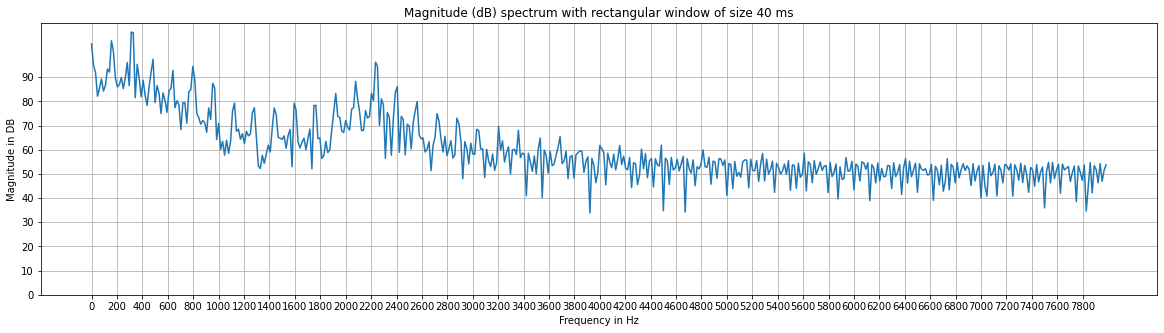

In [16]:
win_size = 5e-3
r_w=rect_window(640)
V_n = output3[4000:4000+r_w.shape[0]]* r_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xticks(np.arange(0, 8000, 200))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size 40 ms')
formants=actual_formants(mag_vk)
actual_f0=pitch_120(mag_vk)
print('Formants obtained using a Rectangular window of length 40 ms are: ')
print(' Actual F0 :',actual_f0)
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error0=actual_f0-F0
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(" Error in F0:{} Hz".format(error0))
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: with highest window length the error decreased in 1st and 2nd formant and remained almost same in 3rd formant.Error present in pitch is almost same as in above case.

##  Hamming Window Length = 5 ms

Formants obtained using a Hamming window of length 5 ms are: 
 First Formant: 296.875 Hz 
 Second Formant: 843.75 Hz 
 Third Formant: 2234.375 Hz
 Error in 1st Formant: -3.125 Hz 
 Error in Second Formant: -26.25 Hz 
 Error in Third Formant: -5.625 Hz


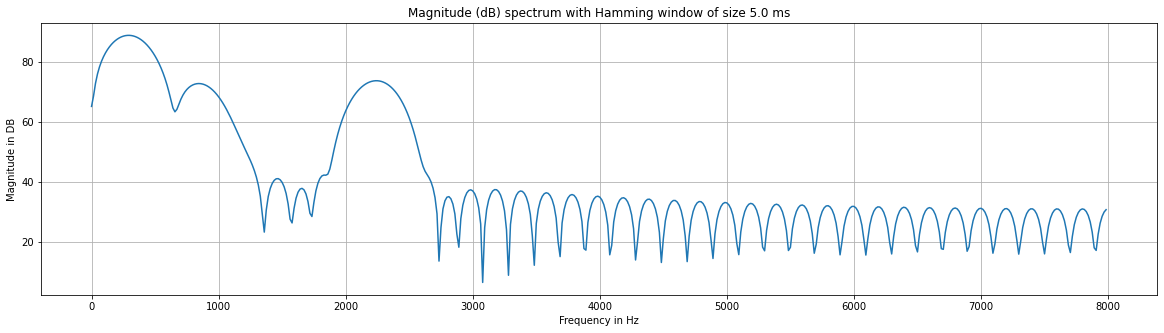

In [17]:
F0=120
h_w=hamming_window(80)
V_n = output3[4000:4000+h_w.shape[0]]*h_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with Hamming window of size {} ms'.format(win_size*1000))
formants=actual_formants(mag_vk)

print('Formants obtained using a Hamming window of length 5 ms are: ')
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: Error is more in 2nd formant and very less in 1st and 3rd formants

##  Hamming Window Length = 10 ms

Formants obtained using a Hamming window of length 10 ms are: 
 First Formant: 328.125 Hz 
 Second Formant: 796.875 Hz 
 Third Formant: 2234.375 Hz
 Error in 1st Formant: 28.125 Hz 
 Error in Second Formant: -73.125 Hz 
 Error in Third Formant: -5.625 Hz


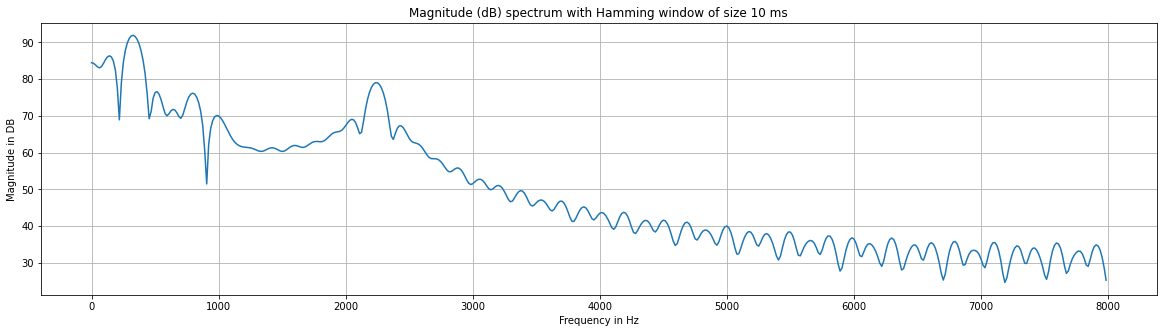

In [18]:

h_w=hamming_window(160)
V_n = output3[4000:4000+h_w.shape[0]]*h_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with Hamming window of size 10 ms')
formants=actual_formants(mag_vk)

print('Formants obtained using a Hamming window of length 10 ms are: ')
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: With increase in window length error  is more in 2nd formant as  well as in 1st formant as compared to above case.In3rd formant negligible change is present.

##  Hamming Window Length = 20 ms

Formants obtained using a Hamming window of length 20 ms are: 
 Actual F0 : 109.375
 First Formant: 312.5 Hz 
 Second Formant: 796.875 Hz 
 Third Formant: 2234.375 Hz
 Error in F0:-10.625 Hz
 Error in 1st Formant: 12.5 Hz 
 Error in Second Formant: -73.125 Hz 
 Error in Third Formant: -5.625 Hz


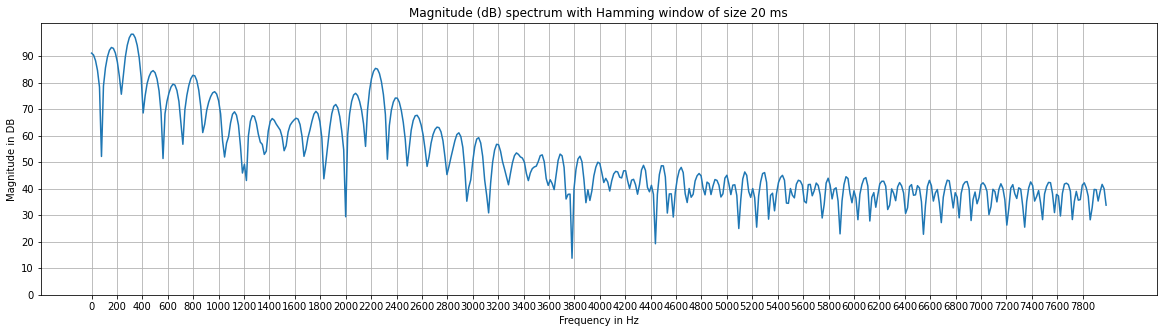

In [19]:
F0=120
h_w=hamming_window(320)
V_n = output3[4000:4000+h_w.shape[0]]*h_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xticks(np.arange(0, 8000, 200))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with Hamming window of size 20 ms')
formants=actual_formants(mag_vk)
actual_f0=pitch_120(mag_vk)
print('Formants obtained using a Hamming window of length 20 ms are: ')
print(' Actual F0 :',actual_f0)
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error0=actual_f0-F0
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(" Error in F0:{} Hz".format(error0))
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: With further increase in window length error in 1st formant decreases while in 2nd and 3rd formant almost remains same. Also there is some error present in pitch.

##  Hamming Window Length = 40 ms

Formants obtained using a Hamming window of length 40 ms are: 
 Actual F0 : 109.375
 First Formant: 312.5 Hz 
 Second Formant: 796.875 Hz 
 Third Formant: 2234.375 Hz
 Error in F0:-10.625 Hz
 Error in 1st Formant: 12.5 Hz 
 Error in Second Formant: -73.125 Hz 
 Error in Third Formant: -5.625 Hz


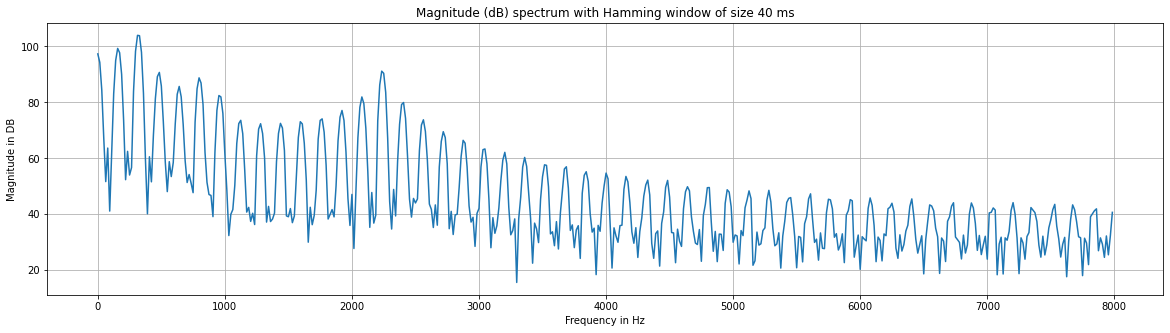

In [20]:
F0=120
h_w=hamming_window(640)
V_n = output3[4000:4000+h_w.shape[0]]*h_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with Hamming window of size 40 ms')
formants=actual_formants(mag_vk)
actual_f0=pitch_120(mag_vk)
print('Formants obtained using a Hamming window of length 40 ms are: ')
print(' Actual F0 :',actual_f0)
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error0=actual_f0-F0
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(" Error in F0:{} Hz".format(error0))
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: Here increase in window length doesn't have much effect.All the value remains almost similiar to above case.

## **Synthesising Vowel "U" for F0=220 Hz**
By using Assignment 1A

Value of r is : 0.9805565561462569
Value of r^2 is :  0.9614911598014075
Value of theta1 is : 0.11780972450961724
Value of theta2 is : 0.34164820107789
Value of theta3 is : 0.8796459430051421


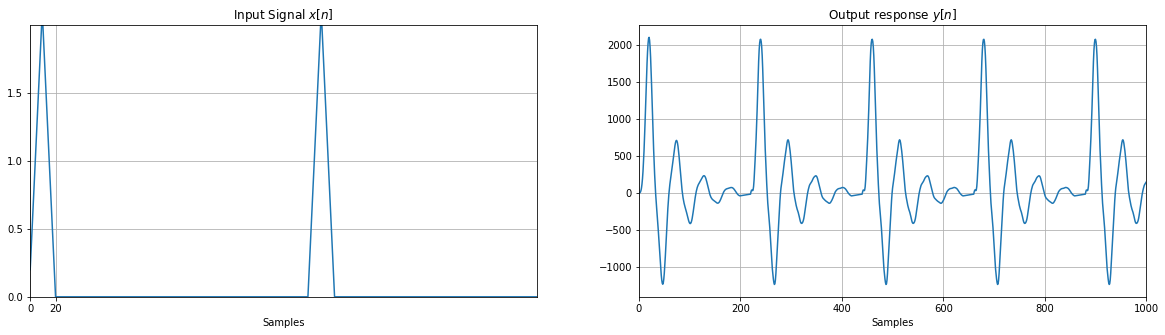

In [21]:
F1 = 300
F2=870
F3=2240
B1 = 100  
F0=220
theta1=2*math.pi*F1*T
theta2=2*math.pi*F2*T
theta3=2*math.pi*F3*T
cost1 = math.cos(theta1)
cost2 = math.cos(theta2)
cost3 = math.cos(theta3)

x=-1*math.pi*B1*T

r=math.exp(x)

print("Value of r is :",r)
print("Value of r^2 is : ",r**2)
print("Value of theta1 is :",theta1)
print("Value of theta2 is :",theta2)
print("Value of theta3 is :",theta3)

R=math.exp(x)
#first_iteration)

# Input Signal Triangle Unit 
input = [] 
i=0

while i<10:
    input.append((1+i)/5)
    i = i+1
    
i = 0
    
while i<10 :
    input.append((10-i)/5)
    i = i+1

i = 0
while i<200 :
    input.append(0)
    i = i+1    



total_in = []
ts = []
i = 0
total_in = []
ts = []
i = 0
for k in range(5):
    i = 0
    while i<len(input):
        total_in.append(input[i])
        ts.append(i+k*len(input))
        i = i+1  

output1 = []

out = 0
y_mone =0
y_mtwo = 0 
# N= 10
n1 = []
i= 0

k = 0 
while i<220 :
    j = 0
    k = k+1
    while j<200:
        y_mtwo = y_mone
        y_mone = out
        out = input[j]+(2*R*cost1*y_mone) -(R*R*y_mtwo)
        n1.append(((k-1)*220)+j)
        output1.append(out)
        j = j+1

    i = i+1

output1 = np.array(output1)

    
#Iteration_2
# Outputs
output2 = []

out = 0
y_mone =0
y_mtwo = 0 
# N= 10
n2 = []
i= 0

k = 0 
while i<220 :
    j = 0
    k = k+1
    while j<200:
        y_mtwo = y_mone
        y_mone = out
        out = output1[j]+(2*R*cost2*y_mone) -(R*R*y_mtwo)
        n2.append(((k-1)*220)+j)
        output2.append(out)
        j = j+1

    i = i+1

output2 = np.array(output2)


output3_220 = []

out = 0
y_mone =0
y_mtwo = 0 
# N= 10
n3 = []
i= 0

k = 0 
while i<220 :
    j = 0
    k = k+1
    while j<200:
        y_mtwo = y_mone
        y_mone = out
        out = output2[j]+(2*R*cost3*y_mone) -(R*R*y_mtwo)
        n3.append(((k-1)*220)+j)
        output3_220.append(out)
        j = j+1

    i = i+1

output3_220 = np.array(output3_220)
Audio(output3_220,rate =16000)
plt.rcParams["figure.figsize"] = (20,5)
plt.subplot(1, 2, 1)
plt.plot(ts,total_in)
plt.ylim((0,2))
plt.xlim((0,400))
plt.xticks(np.arange(0, 40, 20))
plt.yticks(np.arange(0, 2, .5))
plt.xlabel("Samples")
plt.grid(True)

plt.title("Input Signal $x[n]$")
plt.subplot(1, 2, 2)
plt.plot(n3,output3_220)
plt.xlim((0,1000))
plt.grid(True)
plt.xlabel("Samples")
plt.title("Output response $y[n]$")
plt.show()
Audio(output3_220,rate =16000)

##  Rectangular Window Length = 5 ms

Formants obtained using a Rectangular window of length 5 ms are: 
 First Formant: 281.25 Hz 
 Second Formant: 843.75 Hz 
 Third Formant: 2343.75 Hz
 Error in 1st Formant: -18.75 Hz 
 Error in Second Formant: -26.25 Hz 
 Error in Third Formant: 103.75 Hz


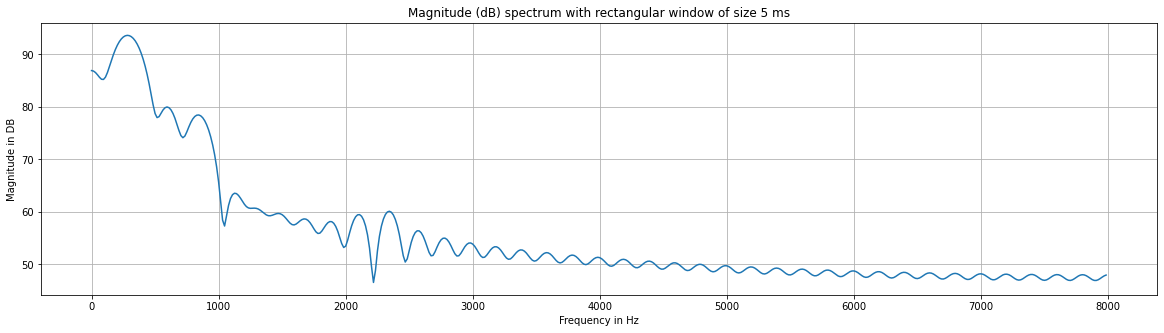

In [22]:

r_w=rect_window(80)
V_n = output3_220[4000:4000+r_w.shape[0]]* r_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size 5 ms')
formants=actual_formants(mag_vk)

print('Formants obtained using a Rectangular window of length 5 ms are: ')
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: Error in 1st Formant and 2nd formant is small but error in 3rd formant is quite high.

##  Rectangular Window Length = 10 ms

Formants obtained using a Rectangular window of length 10 ms are: 
 First Formant: 296.875 Hz 
 Second Formant: 843.75 Hz 
 Third Formant: 2218.75 Hz
 Error in 1st Formant: -3.125 Hz 
 Error in Second Formant: -26.25 Hz 
 Error in Third Formant: -21.25 Hz


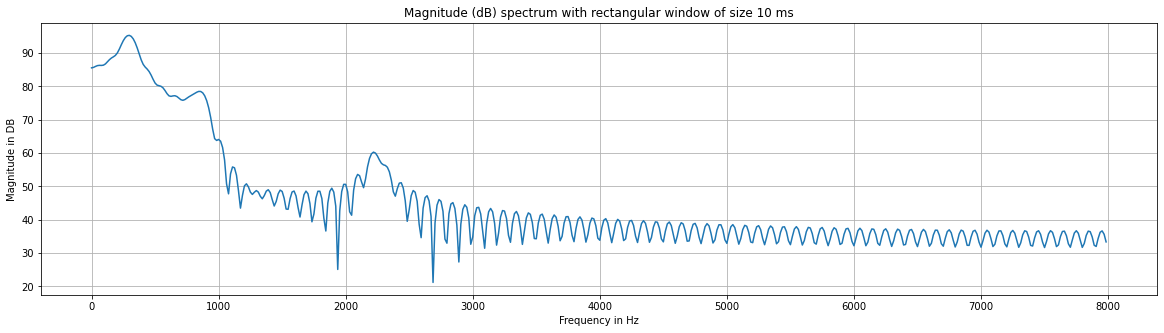

In [23]:
r_w=rect_window(160)
V_n = output3_220[4000:4000+r_w.shape[0]]* r_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size 10 ms')
formants=actual_formants(mag_vk)

print('Formants obtained using a Rectangular window of length 10 ms are: ')
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: With increase in window length  we see error in all the formant decreases.And we can see huge decrease in error in 3rd formant. 

##  Rectangular Window Length = 20 ms

Formants obtained using a Rectangular window of length 20 ms are: 
 Actual F0 : 218.75
 First Formant: 312.5 Hz 
 Second Formant: 796.875 Hz 
 Third Formant: 2234.375 Hz
 Error in F0: -1.25
 Error in 1st Formant: 12.5 Hz 
 Error in Second Formant: -73.125 Hz 
 Error in Third Formant: -5.625 Hz


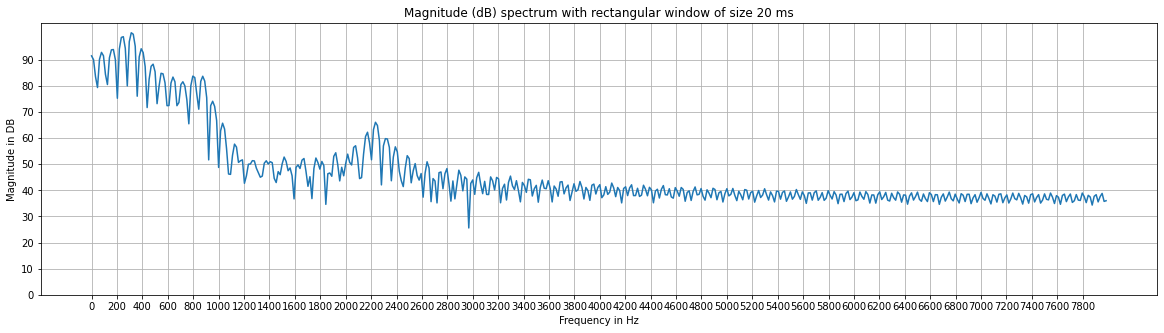

In [24]:
r_w=rect_window(320)
V_n = output3_220[4000:4000+r_w.shape[0]]* r_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xticks(np.arange(0, 8000, 200))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size 20 ms')
formants=actual_formants(mag_vk)
actual_f0=pitch_220(mag_vk)
print('Formants obtained using a Rectangular window of length 20 ms are: ')
print(' Actual F0 :',actual_f0)
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error0=actual_f0-F0
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(" Error in F0:",error0)
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: we can see that error in pitch is very less i.e negligible.While error in 1st formant slightly increases error in 2nd formant has increased and error in 3rd formant has decreased.

##  Rectangular Window Length = 40 ms

Formants obtained using a Rectangular window of length 40 ms are: 
 Actual F0 : 218.75
 First Formant: 312.5 Hz 
 Second Formant: 718.75 Hz 
 Third Formant: 2234.375 Hz
 Error in F0:-1.25 Hz
 Error in 1st Formant: 12.5 Hz 
 Error in Second Formant: -151.25 Hz 
 Error in Third Formant: -5.625 Hz


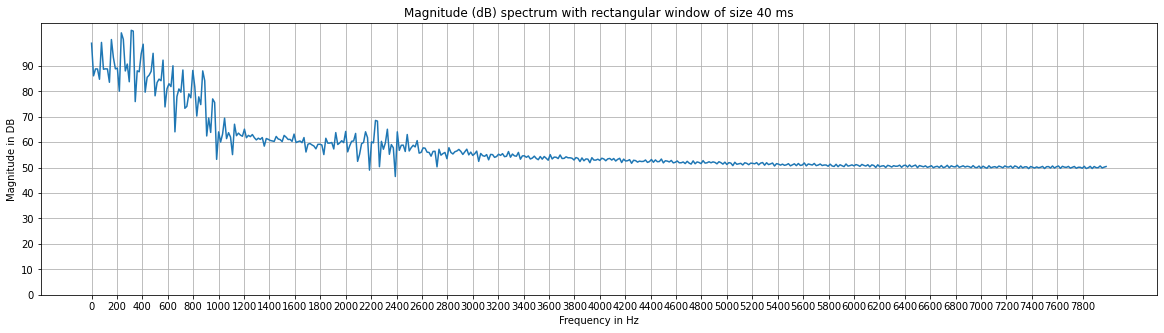

In [25]:
r_w=rect_window(640)
V_n = output3_220[4000:4000+r_w.shape[0]]* r_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xticks(np.arange(0, 8000, 200))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size 40 ms')
formants=actual_formants(mag_vk)
actual_f0=pitch_220(mag_vk)
print('Formants obtained using a Rectangular window of length 40 ms are: ')
print(' Actual F0 :',actual_f0)
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error0=actual_f0-F0
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(" Error in F0:{} Hz".format(error0))
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))


Observation: Error in Pitch remains the same as above case.While error in 1st and 3rd formant remained almost samebut error in 2nd formant increased very much.

##  Hamming Window Length = 5 ms

Formants obtained using a Hamming window of length 5 ms are: 
 First Formant: 296.875 Hz 
 Second Formant: 843.75 Hz 
 Third Formant: 2296.875 Hz
 Error in 1st Formant: -3.125 Hz 
 Error in Second Formant: -26.25 Hz 
 Error in Third Formant: 56.875 Hz


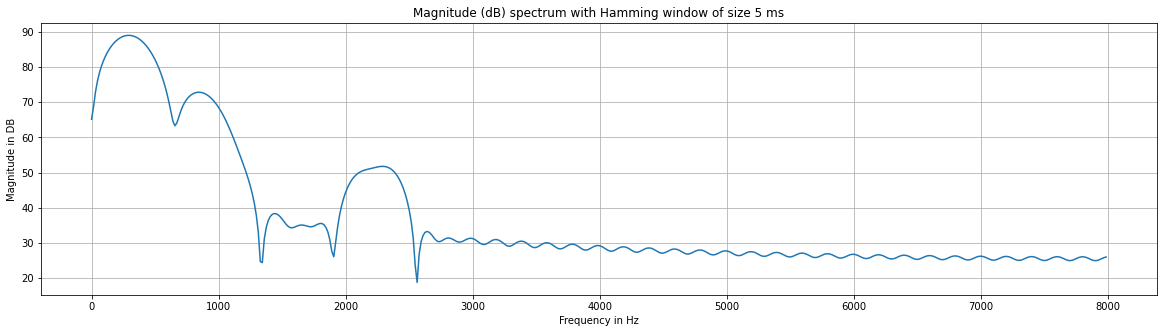

In [26]:
h_w=hamming_window(80)
V_n = output3_220[4000:4000+h_w.shape[0]]*h_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with Hamming window of size 5 ms')
formants=actual_formants(mag_vk)

print('Formants obtained using a Hamming window of length 5 ms are: ')

print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation:Error in 1st formant is very less and error in 2nd and 3rd formant is higher.

##  Hamming Window Length = 10 ms

Formants obtained using a Hamming window of length 10 ms are: 
 First Formant: 296.875 Hz 
 Second Formant: 859.375 Hz 
 Third Formant: 2234.375 Hz
 Error in 1st Formant: -3.125 Hz 
 Error in Second Formant: -10.625 Hz 
 Error in Third Formant: -5.625 Hz


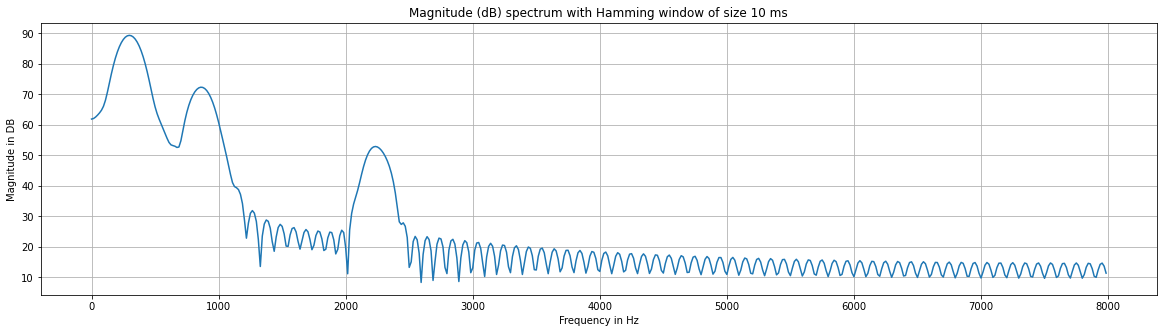

In [27]:
h_w=hamming_window(160)
V_n = output3_220[4000:4000+h_w.shape[0]]*h_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with Hamming window of size 10 ms')
formants=actual_formants(mag_vk)

print('Formants obtained using a Hamming window of length 10 ms are: ')

print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: Error is same in 1st formant also there is huge reduction in error in 2nd and 3rd formants as compared to above case.

##  Hamming Window Length = 20 ms

Formants obtained using a Hamming window of length 20 ms are: 
 Actual F0 : 234.375
 First Formant: 328.125 Hz 
 Second Formant: 890.625 Hz 
 Third Formant: 2234.375 Hz
 Error in F0: 14.375 Hz 
 Error in 1st Formant: 28.125 Hz 
 Error in Second Formant: 20.625 Hz 
 Error in Third Formant: -5.625 Hz


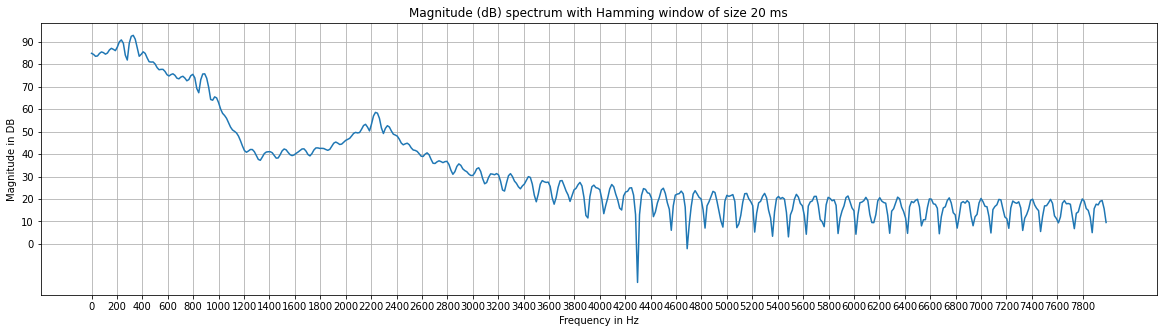

In [28]:

F0=220
h_w=hamming_window(320)
V_n = output3_220[4000:4000+h_w.shape[0]]*h_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xticks(np.arange(0, 8000, 200))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with Hamming window of size 20 ms')
formants=actual_formants(mag_vk)
actual_f0=pitch_220(mag_vk)
print('Formants obtained using a Hamming window of length 20 ms are: ')
print(' Actual F0 :',actual_f0)
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error0=actual_f0-F0
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(" Error in F0: {} Hz ".format(error0))
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: There is slight error present in calculation of pitch.As compared to above case error in 1st and 2nd formant increases while in 3rd formant almost remained same.

##  Hamming Window Length = 40 ms

Formants obtained using a Hamming window of length 40 ms are: 
 Actual F0 : 218.75
 First Formant: 312.5 Hz 
 Second Formant: 875.0 Hz 
 Third Formant: 2234.375 Hz
 Error in F0:-1.25 Hz
 Error in 1st Formant: 12.5 Hz 
 Error in Second Formant: 5.0 Hz 
 Error in Third Formant: -5.625 Hz


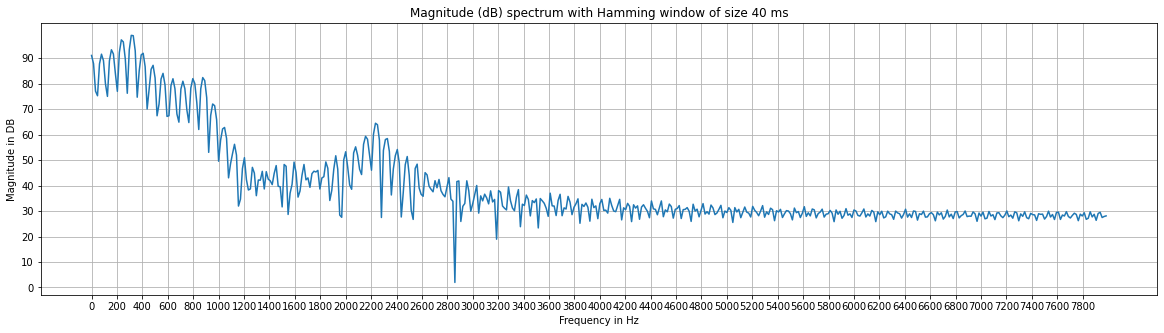

In [29]:
h_w=hamming_window(640)
V_n = output3_220[4000:4000+h_w.shape[0]]*h_w
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], T)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xticks(np.arange(0, 8000, 200))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with Hamming window of size 40 ms')
formants=actual_formants(mag_vk)
actual_f0=pitch_220(mag_vk)
print('Formants obtained using a Hamming window of length 40 ms are: ')
print(' Actual F0 :',actual_f0)
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formants[0],formants[1],formants[2]))
error0=actual_f0-F0
error1=formants[0]-F1
error2=formants[1]-F2
error3=formants[2]-F3
print(" Error in F0:{} Hz".format(error0))
print(' Error in 1st Formant: {} Hz \n Error in Second Formant: {} Hz \n Error in Third Formant: {} Hz'.format(error1,error2,error3))

Observation: As compared to above case error is negligible in pitch.Also there been a huge reduction in errors in all the formants.

## Error Comparison Table

I have manually stored all the values of Error in Pitch and Formants to the below tables.<br>

$$
\begin{aligned}
& \text {Table depicting  Actual Formants and Error value for F0=120Hz}\\
&\begin{array}{cccc}
\hline \hline \text { Window Length } & \text { Window Type } & \text { F1 } & \text {F2 }&\text {F3 }&\text { Error in F0 }&\text { Error in F1 }&\text { Error in F2 }&\text { Error in F3 } \\
\hline 5ms & Rectangular & 281.25 & 843.75 & 2250 &&-18.75&-26.25&10 \\
10ms & Rectangular & 312.5 & 796.875 & 2234.375 && 12.5&-73.125&-5.625 \\
20ms & Rectangular & 328.125 & 812.5 & 2234.375 & -10.625& 28.125.5&-57.5&-5.625 \\
40ms & Rectangular & 312.5 & 796.875 & 2234.375 & -10.625& 12.5&-73.125&-5.625 \\
5ms & Hamming  & 296.875 & 843.75 & 2234.375 && -3.125&-26.25&-5.625\\
10ms & Hamming  & 328.125 & 796.875 & 2234.375 && 28.125& -73.125&-5.625 \\
20ms & Hamming  & 312.5 & 796.875 & 2234.375 & -10.625& 12.5&-73.125&-5.625 \\
40ms & Hamming  & 312.5 & 796.825 & 2234.375 & -10.625& 12.5&-73.125&-5.625\\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \text {Table depicting  Actual Formants and Error value for F0=220Hz}\\
&\begin{array}{cccc}
\hline \hline \text { Window Length } & \text { Window Type } & \text { F1 } & \text {F2 }&\text {F3 }&\text { Error in F0 }&\text { Error in F1 }&\text { Error in F2 }&\text { Error in F3 } \\
\hline 5ms & Rectangular & 281.25 & 843.75 & 2343.75 && -18.75&-26.25&-103.75 \\
10ms & Rectangular & 296.875 & 843.75 & 2218.75 && -3.125&-26.25&-21.25 \\
20ms & Rectangular & 312.5 & 875 & 2234.375 & -1.25& 12.5&5&-5.625 \\
40ms & Rectangular & 312.5 & 718.75 & 2234.375 & -1.25& 12.5&-151.25&-5.625 \\
5ms & Hamming  & 296.875 & 843.75 & 2296.875 && -3.125&-26.25&-56.875\\
10ms & Hamming  & 296.875 & 859.375 & 2234.375 && -3.125& -10.625&-5.625 \\
20ms & Hamming  & 328.125 & 875 & 2234.375 & 14.375& 28.1255&20.625&-5.625 \\
40ms & Hamming  & 312.5 & 890.625 & 2234.375 & -1.25& 12.5&5&-5.625\\
\hline
\end{array}
\end{aligned}
$$

## **Observations**

### 1. Effect with change of Window Type:
 1. We can clearly that the lobes(formants) are more wider looking in hamming window than rectangular window.
 2. From 1 we can say that number of lobes observed in rectangular window are more than that of hamming window with respect to fixed number of samples.
 3. It can be clearly seen that the error in calculating the parameters are more in rectangular window than the hamming window.
 4. We can also observe that the difference between main lobe magnitudes and side lobe magnitudes was more in hamming window as compared to the rectangular window.Therefore we can say that sides lobes are sufficiently suppressed by hamming window as compared to rectangular window.
 
### 2. Effect with Change in  Pitch F0:
   1. Error in  F0 is found to be less in 220 Hz signal as compared to 120 Hz signal. 
   2. In case of low pitch sound i.e. 120 Hz  we found that there are more number of harmonics as compared to the high pitched sound i.e. 220 Hz when we used large window size . .
   3. There is small change in highest magnitude with change in F0 ,220 Hz signal has less magnitude when compared with 120 Hz signal.Possible reason being that  the magnitude in frequency in related to the time period.
   4. In case of higher window length formants are far better visible in low pitched sound when compared with high pitched sound. Formants F1 and F2 are clearly visible in both the spectrum but formant F3 then it is clearly visible in low pitched sound. 
   
### 3. Effect with Change of Window length:
* For Smaller Window :
 1. When we used smaller window size (5 ms) then the error in calculating the  Formant F1  is more in  comparison when we used a slight large window size(10 ms)
 2. When we used small window all the lobes of sinc function were merged in frequeny spectra and we observed a magnitude spectrum where formant locations were clearly identifiable. However, calculating the F0 or any other harmonics was not possible using this analysis.
 3. Based on the observed error by using different window size we can see that error in calculating F2 and F3 10 ms window size did better job than 5ms window size.
 
 <br>

* For Larger Window :
 1.  we can see that there is not much change in error in caclulating F0 by using different window length i.e. 20 and 40 ms.
 2.  As we know width of lobes in case of recftangular window = $4\pi/L$ where, L is window length. When we use larger window, the width of side lobes decreases and the harmonics were more clearly visible here. However, if we try to calculate formant locations here we might high errors because there is no sample now at formant locations that is lobes are now narrower.
 3. In  window size 20 ms the harmonics are visible along with side lobes but for higher window size  40 ms we can see that harmonics and side lobes are more clearly visible with more amplitude. 
 



